## EDA AND DATA CLEANING

In [34]:
import pandas as pd

df_receivals = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\receivals.csv')
df_purchase_orders = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\kernel\purchase_orders.csv')
df_materials = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\extended\materials.csv')
df_transportation = pd.read_csv(r'C:\Users\bupat\OneDrive\Documentos\NTNU\modern_ml_in_practice\append_consulting_project\data\extended\transportation.csv')

## LOOKING AT DF_RECEIVALS AS IT IS THE MAIN DATASET

In [35]:
print("\n----- Info -----")
df_receivals.info()

print("\n----- Summary Statistics -----")
print(df_receivals.describe())


----- Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122590 entries, 0 to 122589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122533 non-null  float64
 1   product_id              122533 non-null  float64
 2   purchase_order_id       122537 non-null  float64
 3   purchase_order_item_no  122537 non-null  float64
 4   receival_item_no        122590 non-null  int64  
 5   batch_id                64765 non-null   float64
 6   date_arrival            122590 non-null  object 
 7   receival_status         122590 non-null  object 
 8   net_weight              122522 non-null  float64
 9   supplier_id             122590 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 9.4+ MB

----- Summary Statistics -----
               rm_id    product_id  purchase_order_id  purchase_order_item_no  \
count  122533.000000  1.225330e+05      122537.0

#### WRITING SOME THOUGHTS: I FEEL LIKE RM_ID, SUPPLIER_ID, PRODUCT_ID, RECEIVAL_STATUS AND ARRIVAL_DATE COULD BE IMPORTANT FOR FURTHER USE. PURCHASE_ID IS PROBABLY TO NO USE AS FUTURE PURCHASES HAVE THEIR OWN PURCHASE_ID SO PROBABLY USELESS. BATCH_ID HAS A LOT OF NULL VALUES SO MIGHT ALSO NOT BE INTERESTING. PURCHASE_ID COULD BE USEFUL TO CONNECT BETWEEN DATASETS IN THE FUTURE THOUGH.

## DROP ROWS WHERE NET_WEIGHT IS NULL

In [36]:
df_receivals = df_receivals.dropna(subset=['net_weight'])

## 

In [37]:
# Count how many times each purchase_id appears
purchase_counts = df_receivals['purchase_order_id'].value_counts()
print("----- Purchase ID Counts -----")
print(purchase_counts)

# Filter for the specific purchase_order_id
df_filtered = df_receivals[df_receivals['purchase_order_id'] == 212977.0]

# Display all the unique dates for that purchase order
print("Dates for purchase_order_id 212977.0:")
print(df_filtered['date_arrival'].unique())



----- Purchase ID Counts -----
purchase_order_id
300251.0    977
212960.0    939
212958.0    675
212970.0    565
212977.0    534
           ... 
300743.0      1
300742.0      1
285127.0      1
285299.0      1
285326.0      1
Name: count, Length: 7173, dtype: int64
Dates for purchase_order_id 212977.0:
['2005-01-13 09:52:00 +01:00' '2005-01-17 09:02:00 +01:00'
 '2005-01-19 12:28:00 +01:00' '2005-01-19 13:16:00 +01:00'
 '2005-01-25 08:52:00 +01:00' '2005-01-25 09:49:00 +01:00'
 '2005-01-28 08:46:00 +01:00' '2005-01-28 09:43:00 +01:00'
 '2005-02-01 11:00:00 +01:00' '2005-02-07 09:41:00 +01:00'
 '2005-02-07 10:08:00 +01:00' '2005-02-08 11:21:00 +01:00'
 '2005-02-09 10:09:00 +01:00' '2005-02-10 10:31:00 +01:00'
 '2005-02-14 09:15:00 +01:00' '2005-02-16 09:36:00 +01:00'
 '2005-02-18 10:49:00 +01:00' '2005-02-21 09:50:00 +01:00'
 '2005-02-22 10:29:00 +01:00' '2005-02-25 12:05:00 +01:00'
 '2005-03-02 12:23:00 +01:00' '2005-03-07 11:32:00 +01:00'
 '2005-03-08 11:52:00 +01:00' '2005-03-14 09:53:

### GET LATEST DATE

In [38]:
# Get the latest (maximum) date_arrival value
latest_date = df_receivals['date_arrival'].max()

print("Latest date_arrival:", latest_date)

Latest date_arrival: 2024-12-19 13:36:00 +00:00


## DROP BATCH_ID

In [39]:
df_receivals = df_receivals.drop(columns=['batch_id'])

## MERGING PURCHASE_ORDERS AND RECEIVALS DATASETS INTO ONE

In [40]:
df_rec_purchase = df_receivals.merge(
    df_purchase_orders,
    on=['purchase_order_id', 'purchase_order_item_no', 'product_id'],
    how='left'
)
print("\n----- Merged DataFrame Info -----")
df_rec_purchase.info()


----- Merged DataFrame Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122522 entries, 0 to 122521
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122520 non-null  float64
 1   product_id              122520 non-null  float64
 2   purchase_order_id       122520 non-null  float64
 3   purchase_order_item_no  122520 non-null  float64
 4   receival_item_no        122522 non-null  int64  
 5   date_arrival            122522 non-null  object 
 6   receival_status         122522 non-null  object 
 7   net_weight              122522 non-null  float64
 8   supplier_id             122522 non-null  int64  
 9   quantity                118580 non-null  float64
 10  delivery_date           118580 non-null  object 
 11  product_version         118580 non-null  float64
 12  created_date_time       118580 non-null  object 
 13  modified_date_time      118220 non-null

## NOW MERGING DF_REC_PURCHASE WITH DF_MATERIALS

In [41]:
# Merge df_rec_purchase with df_materials
df_rec_purchase = df_rec_purchase.merge(
    df_materials,
    on=['rm_id', 'product_id', 'product_version'],
    how='left'
)


# Display info about the final merged DataFrame
print("\n----- Final Merged DataFrame Info -----")
df_rec_purchase.info()


----- Final Merged DataFrame Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122522 entries, 0 to 122521
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rm_id                     122520 non-null  float64
 1   product_id                122520 non-null  float64
 2   purchase_order_id         122520 non-null  float64
 3   purchase_order_item_no    122520 non-null  float64
 4   receival_item_no          122522 non-null  int64  
 5   date_arrival              122522 non-null  object 
 6   receival_status           122522 non-null  object 
 7   net_weight                122522 non-null  float64
 8   supplier_id               122522 non-null  int64  
 9   quantity                  118580 non-null  float64
 10  delivery_date             118580 non-null  object 
 11  product_version           118580 non-null  float64
 12  created_date_time         118580 non-null  object 
 13  mod

## DROP DUPLICATE ROWS

In [42]:
#finding count of duplicates in df_rec_purchase
duplicates = df_rec_purchase[df_rec_purchase.duplicated()]
print("\n----- Count of Duplicates")
print(duplicates.shape[0])

#dropping duplicates
df_rec_purchase = df_rec_purchase.drop_duplicates()
df_rec_purchase.info()


----- Count of Duplicates
5
<class 'pandas.core.frame.DataFrame'>
Index: 122517 entries, 0 to 122521
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rm_id                     122515 non-null  float64
 1   product_id                122515 non-null  float64
 2   purchase_order_id         122515 non-null  float64
 3   purchase_order_item_no    122515 non-null  float64
 4   receival_item_no          122517 non-null  int64  
 5   date_arrival              122517 non-null  object 
 6   receival_status           122517 non-null  object 
 7   net_weight                122517 non-null  float64
 8   supplier_id               122517 non-null  int64  
 9   quantity                  118578 non-null  float64
 10  delivery_date             118578 non-null  object 
 11  product_version           118578 non-null  float64
 12  created_date_time         118578 non-null  object 
 13  modified_date_time  

## DROP ROWS WITH NULL VALUES IN RM_ID

In [43]:
#dropping rows with null values in rm_id
df_rec_purchase = df_rec_purchase.dropna(subset=['rm_id'])
df_rec_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122515 entries, 0 to 122521
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rm_id                     122515 non-null  float64
 1   product_id                122515 non-null  float64
 2   purchase_order_id         122515 non-null  float64
 3   purchase_order_item_no    122515 non-null  float64
 4   receival_item_no          122515 non-null  int64  
 5   date_arrival              122515 non-null  object 
 6   receival_status           122515 non-null  object 
 7   net_weight                122515 non-null  float64
 8   supplier_id               122515 non-null  int64  
 9   quantity                  118578 non-null  float64
 10  delivery_date             118578 non-null  object 
 11  product_version           118578 non-null  float64
 12  created_date_time         118578 non-null  object 
 13  modified_date_time        118218 non-null  object

## CHANGE NET_WEIGHT WHERE UNIT = 'PUND' TO KG. MIGHT WANT TO DO THE SAME FOR VEHICLE_START_WEIGHT AND VEHICLE_END_WEIGHT LATER

In [44]:
#for the rows where unit = 'PUND' change net_weight and quantity to kg
df_rec_purchase.loc[df_rec_purchase['unit'] == 'PUND', ['net_weight', 'quantity']] *= 0.453592

#drop unit and unit_id rows as now everything is in kg
df_rec_purchase = df_rec_purchase.drop(columns=['unit', 'unit_id'])

### DROP NON-INTUITIONAL FEATURES

In [45]:
#drop unnecessary columns
df_rec_purchase = df_rec_purchase.drop(columns=['raw_material_alloy', 'delivery_date', 'created_date_time', 'modified_date_time', 'purchase_order_item_no'])
df_rec_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122515 entries, 0 to 122521
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rm_id                     122515 non-null  float64
 1   product_id                122515 non-null  float64
 2   purchase_order_id         122515 non-null  float64
 3   receival_item_no          122515 non-null  int64  
 4   date_arrival              122515 non-null  object 
 5   receival_status           122515 non-null  object 
 6   net_weight                122515 non-null  float64
 7   supplier_id               122515 non-null  int64  
 8   quantity                  118578 non-null  float64
 9   product_version           118578 non-null  float64
 10  status_id                 118578 non-null  float64
 11  status                    118578 non-null  object 
 12  raw_material_format_type  86556 non-null   float64
 13  stock_location            86556 non-null   object

### NOW MERGING WITH DF_TRANSPORTATION

In [46]:
# Keep only one row per key combination in df_transportation
df_transportation_unique = df_transportation.drop_duplicates(
    subset=['rm_id', 'product_id', 'purchase_order_id', 'net_weight', 'receival_item_no'],
    keep='first'
)

# Identify columns to bring from df_transportation
columns_to_add = [col for col in df_transportation_unique.columns if col not in df_rec_purchase.columns]

# Merge
df_rec_purchase = df_rec_purchase.merge(
    df_transportation_unique[['rm_id', 'product_id', 'purchase_order_id', 'net_weight', 'receival_item_no'] + columns_to_add],
    on=['rm_id', 'product_id', 'purchase_order_id', 'net_weight', 'receival_item_no'],
    how='left'
)

# Check result
print("\n----- Final Merged DataFrame with Transportation Info -----")
df_rec_purchase.info()



----- Final Merged DataFrame with Transportation Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122515 entries, 0 to 122514
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rm_id                     122515 non-null  float64
 1   product_id                122515 non-null  float64
 2   purchase_order_id         122515 non-null  float64
 3   receival_item_no          122515 non-null  int64  
 4   date_arrival              122515 non-null  object 
 5   receival_status           122515 non-null  object 
 6   net_weight                122515 non-null  float64
 7   supplier_id               122515 non-null  int64  
 8   quantity                  118578 non-null  float64
 9   product_version           118578 non-null  float64
 10  status_id                 118578 non-null  float64
 11  status                    118578 non-null  object 
 12  raw_material_format_type  86556 non-nul

In [47]:
#drop unnecessary columns
df_rec_purchase = df_rec_purchase.drop(columns=['tare_weight', 'status', 'wood', 'ironbands', 'plastic', 'water', 'ice', 'other', 
                                                'chips', 'packaging', 'cardboard', 'purchase_order_item_no', 'batch_id'])
df_rec_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122515 entries, 0 to 122514
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rm_id                     122515 non-null  float64
 1   product_id                122515 non-null  float64
 2   purchase_order_id         122515 non-null  float64
 3   receival_item_no          122515 non-null  int64  
 4   date_arrival              122515 non-null  object 
 5   receival_status           122515 non-null  object 
 6   net_weight                122515 non-null  float64
 7   supplier_id               122515 non-null  int64  
 8   quantity                  118578 non-null  float64
 9   product_version           118578 non-null  float64
 10  status_id                 118578 non-null  float64
 11  raw_material_format_type  86556 non-null   float64
 12  stock_location            86556 non-null   object 
 13  transporter_name          122508 non-null  o

### FOR NOW REMOVE STOCK LOCATION AND RAW_MATERIAL_FORMAT_TYPE AS THEY HAVE A LOT OF NULL VALUES, HOWEVER THESE MIGHT BE USEFUL FOR THE FUTURE SO KEEP THESE IN THOUGH

In [48]:
#drop unnecessary columns
df_rec_purchase = df_rec_purchase.drop(columns=['raw_material_format_type', 'stock_location'])
df_rec_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122515 entries, 0 to 122514
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rm_id                 122515 non-null  float64
 1   product_id            122515 non-null  float64
 2   purchase_order_id     122515 non-null  float64
 3   receival_item_no      122515 non-null  int64  
 4   date_arrival          122515 non-null  object 
 5   receival_status       122515 non-null  object 
 6   net_weight            122515 non-null  float64
 7   supplier_id           122515 non-null  int64  
 8   quantity              118578 non-null  float64
 9   product_version       118578 non-null  float64
 10  status_id             118578 non-null  float64
 11  transporter_name      122508 non-null  object 
 12  vehicle_no            122508 non-null  object 
 13  unit_status           122508 non-null  object 
 14  vehicle_start_weight  122494 non-null  float64
 15  

## INDEX VEHICLE_NO, TRANSPORTER_NAME, RECEIVAL_STATUS, DATE_ARRIVAL AND UNIT_STATUS

In [49]:
cols_to_index = ['vehicle_no', 'transporter_name', 'receival_status', 'unit_status']

for col in cols_to_index:
    df_rec_purchase[col] = df_rec_purchase[col].astype('category').cat.codes


### MAKE DATE_ARRIVAL INTO DAY_OF_YEAR, MONTH AND YEAR

In [50]:
# Ensure everything is a string first
df_rec_purchase['date_arrival'] = df_rec_purchase['date_arrival'].astype(str).str.strip()

# Convert to datetime, coerce invalid formats
df_rec_purchase['date_arrival'] = pd.to_datetime(
    df_rec_purchase['date_arrival'], 
    errors='coerce', 
    utc=True  # handle timezone info
)

# Remove timezone and keep only date
df_rec_purchase['date_arrival'] = df_rec_purchase['date_arrival'].dt.tz_localize(None).dt.date

# Convert to string in YYYY-MM-DD format
df_rec_purchase['date_arrival'] = df_rec_purchase['date_arrival'].astype(str)

In [51]:
# Make sure date_arrival is in datetime format
df_rec_purchase['date_arrival'] = pd.to_datetime(df_rec_purchase['date_arrival'], errors='coerce')

# Extract components
df_rec_purchase['day_of_year'] = df_rec_purchase['date_arrival'].dt.dayofyear
df_rec_purchase['month'] = df_rec_purchase['date_arrival'].dt.month
df_rec_purchase['year'] = df_rec_purchase['date_arrival'].dt.year

## RUN CORRELATION HEAT MAP

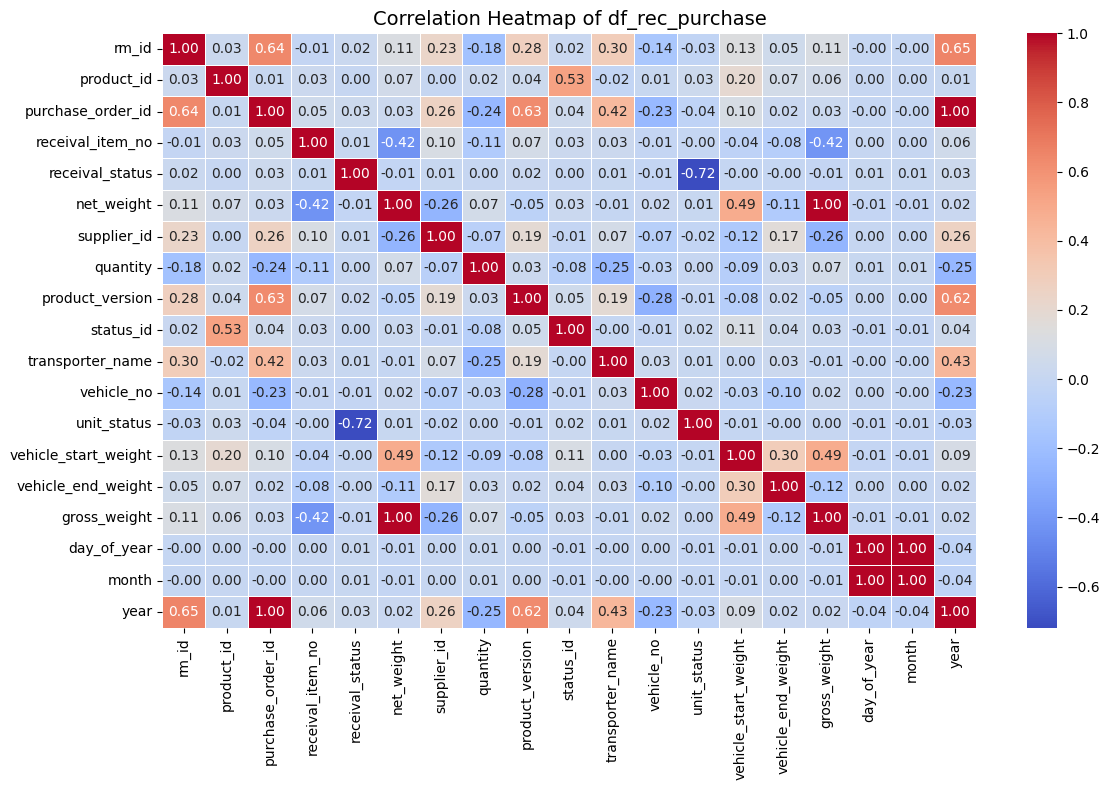

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df_rec_purchase.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of df_rec_purchase", fontsize=14)
plt.tight_layout()
plt.show()

### GROSS WEIGHT AND NET WEIGHT HAVE CORRELATION OF 1 (HAVE TO DROP GROSS WEIGHT), UNIT_STATUS AND RECEIVAL_STATUS HAVE VERY HIGH CORRELATION VALUE (-0.72) SO REMOVE UNIT_STATUS. ALSO PURCHASE_ORDER_ID INCLUDES BOTH DATE, PRODUCT_ID AND RM_ID SO HIGH CORRELATION TO DATE AND RM_ID, SO HAVE TO REMOVE THE ORDER_ID.

In [53]:
#drop gross_weight, unit_status and purchase_order_id
df_rec_purchase = df_rec_purchase.drop(columns=['gross_weight', 'unit_status', 'purchase_order_id'])
df_rec_purchase.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122515 entries, 0 to 122514
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   rm_id                 122515 non-null  float64       
 1   product_id            122515 non-null  float64       
 2   receival_item_no      122515 non-null  int64         
 3   date_arrival          122515 non-null  datetime64[ns]
 4   receival_status       122515 non-null  int8          
 5   net_weight            122515 non-null  float64       
 6   supplier_id           122515 non-null  int64         
 7   quantity              118578 non-null  float64       
 8   product_version       118578 non-null  float64       
 9   status_id             118578 non-null  float64       
 10  transporter_name      122515 non-null  int8          
 11  vehicle_no            122515 non-null  int16         
 12  vehicle_start_weight  122494 non-null  float64       
 13 

## PLOT RM_ID COUNT BY DAY_OF_YEAR AND MONTH

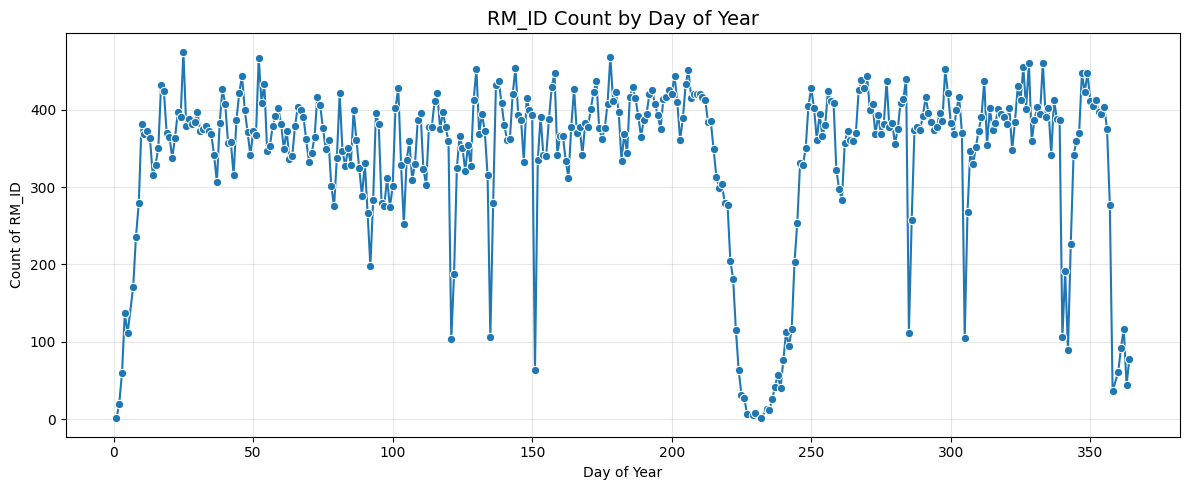

In [54]:
# Count how many rm_id per day_of_year
daily_counts = df_rec_purchase.groupby('day_of_year')['rm_id'].count().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_counts, x='day_of_year', y='rm_id', marker='o')
plt.title("RM_ID Count by Day of Year", fontsize=14)
plt.xlabel("Day of Year")
plt.ylabel("Count of RM_ID")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\bupat\AppData\Local\Temp\ipykernel_11488\1976647907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_counts, x='month', y='rm_id', palette='coolwarm')


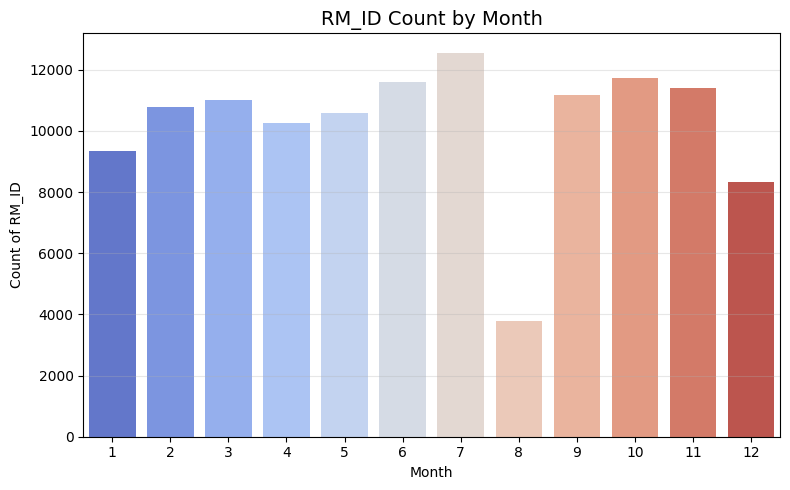

In [55]:
monthly_counts = df_rec_purchase.groupby('month')['rm_id'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_counts, x='month', y='rm_id', palette='coolwarm')
plt.title("RM_ID Count by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count of RM_ID")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## BOTH HAVE VERY SIMILAR BEHAVIOR, ONLY RUN MONTH

In [56]:
#drop day_of_year
df_rec_purchase = df_rec_purchase.drop(columns=['day_of_year', 'date_arrival'])
df_rec_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122515 entries, 0 to 122514
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rm_id                 122515 non-null  float64
 1   product_id            122515 non-null  float64
 2   receival_item_no      122515 non-null  int64  
 3   receival_status       122515 non-null  int8   
 4   net_weight            122515 non-null  float64
 5   supplier_id           122515 non-null  int64  
 6   quantity              118578 non-null  float64
 7   product_version       118578 non-null  float64
 8   status_id             118578 non-null  float64
 9   transporter_name      122515 non-null  int8   
 10  vehicle_no            122515 non-null  int16  
 11  vehicle_start_weight  122494 non-null  float64
 12  vehicle_end_weight    122480 non-null  float64
 13  month                 122515 non-null  int32  
 14  year                  122515 non-null  int32  
dtype

## REMOVE NA VALUES 

In [57]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Select numeric columns for imputation
numeric_cols = df_rec_purchase.select_dtypes(include='number').columns
df_numeric = df_rec_purchase[numeric_cols]

# Initialize MICE imputer
mice_imputer = IterativeImputer(random_state=42, max_iter=10)

# Fit and transform
df_imputed = mice_imputer.fit_transform(df_numeric)

# Convert back to DataFrame with original column names
df_numeric_imputed = pd.DataFrame(df_imputed, columns=numeric_cols)

# Replace numeric columns in original DataFrame
df_rec_purchase[numeric_cols] = df_numeric_imputed

# Verify no missing values remain
print(df_rec_purchase[numeric_cols].isna().sum())

rm_id                   0
product_id              0
receival_item_no        0
receival_status         0
net_weight              0
supplier_id             0
quantity                0
product_version         0
status_id               0
transporter_name        0
vehicle_no              0
vehicle_start_weight    0
vehicle_end_weight      0
month                   0
year                    0
dtype: int64


## DO A CUMULATIVE NET_WEIGHT SUM FOR TOP 5 MOST FREQUENT RM_ID PER YEAR PLOT

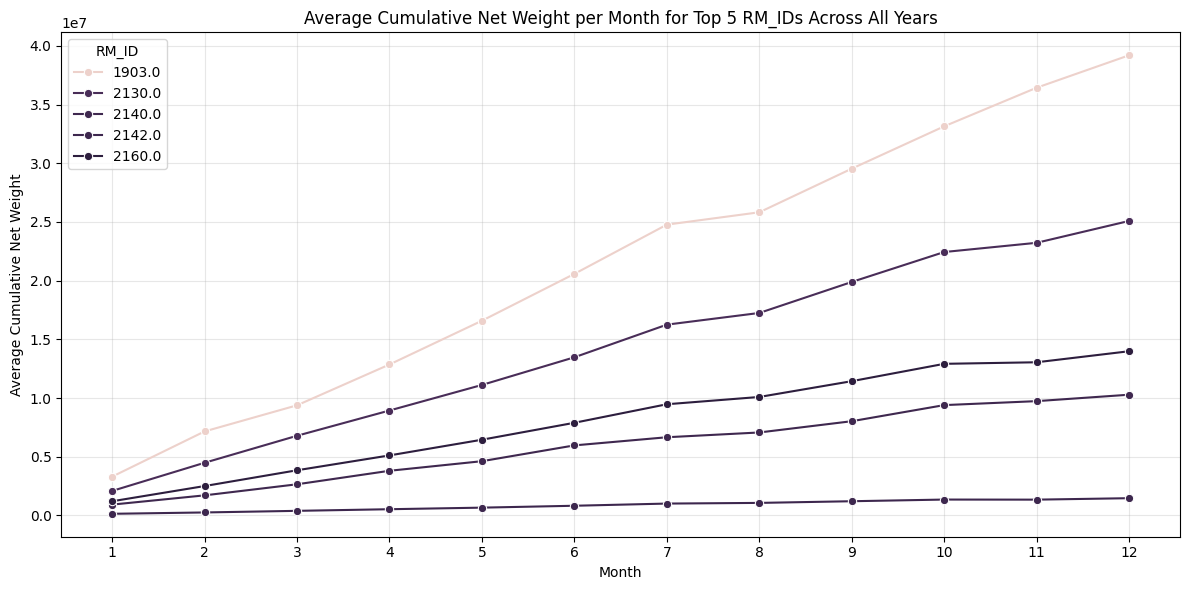

In [58]:
# Select top 5 RM_IDs overall (most frequent in the whole dataset)
top5_rm = df_rec_purchase['rm_id'].value_counts().nlargest(5).index

# Filter to only top 5 RM_IDs
df_top5 = df_rec_purchase[df_rec_purchase['rm_id'].isin(top5_rm)]

# Prepare DataFrame to store cumulative sums
all_cum = pd.DataFrame()

# Loop over each year to compute cumulative sums
for year in df_top5['year'].unique():
    df_year = df_top5[df_top5['year'] == year].copy()
    
    # Sum net_weight per RM_ID per month
    monthly = (
        df_year.groupby(['rm_id', 'month'])['net_weight']
        .sum()
        .reset_index()
        .sort_values(['rm_id', 'month'])
    )
    
    # Compute cumulative net_weight per RM_ID
    monthly['cum_net_weight'] = monthly.groupby('rm_id')['net_weight'].cumsum()
    
    # Add year column
    monthly['year'] = year
    
    all_cum = pd.concat([all_cum, monthly], ignore_index=True)

# Average cumulative net_weight across years for each RM_ID per month
avg_cum = all_cum.groupby(['rm_id', 'month'])['cum_net_weight'].mean().reset_index()

# Plot: exactly 5 lines
plt.figure(figsize=(12,6))
sns.lineplot(
    data=avg_cum,
    x='month',
    y='cum_net_weight',
    hue='rm_id',
    marker='o'
)
plt.title("Average Cumulative Net Weight per Month for Top 5 RM_IDs Across All Years")
plt.xlabel("Month")
plt.ylabel("Average Cumulative Net Weight")
plt.xticks(range(1,13))
plt.grid(True, alpha=0.3)
plt.legend(title='RM_ID')
plt.tight_layout()
plt.show()



### DESCRIPTION PER FEATURE

In [59]:
# Select numeric columns
numeric_cols = df_rec_purchase.select_dtypes(include='number')

# Get descriptive statistics
desc_numeric = numeric_cols.describe().transpose()  # transpose for easier reading

print(desc_numeric)

                         count          mean           std            min  \
rm_id                 122515.0  2.151851e+03  5.081320e+02     342.000000   
product_id            122515.0  9.137375e+07  6.936473e+06    1002.000000   
receival_item_no      122515.0  1.447659e+00  8.460573e-01       1.000000   
receival_status       122515.0  7.264417e-04  2.898607e-02       0.000000   
net_weight            122515.0  1.297275e+04  8.264503e+03       0.000000   
supplier_id           122515.0  5.420088e+04  1.620683e+04   10001.000000   
quantity              122515.0  4.914092e+05  1.098762e+06 -751028.984662   
product_version       122515.0  2.989686e+00  3.157336e+00      -1.887799   
status_id             122515.0  1.987600e+00  1.232169e-01       1.000000   
transporter_name      122515.0  2.192958e+01  3.731430e+00      -1.000000   
vehicle_no            122515.0  8.223133e+03  4.436356e+03      -1.000000   
vehicle_start_weight  122515.0  3.457525e+04  5.731001e+03     698.000000   

## FINDING OUTLIERS BY USING BOX-PLOT

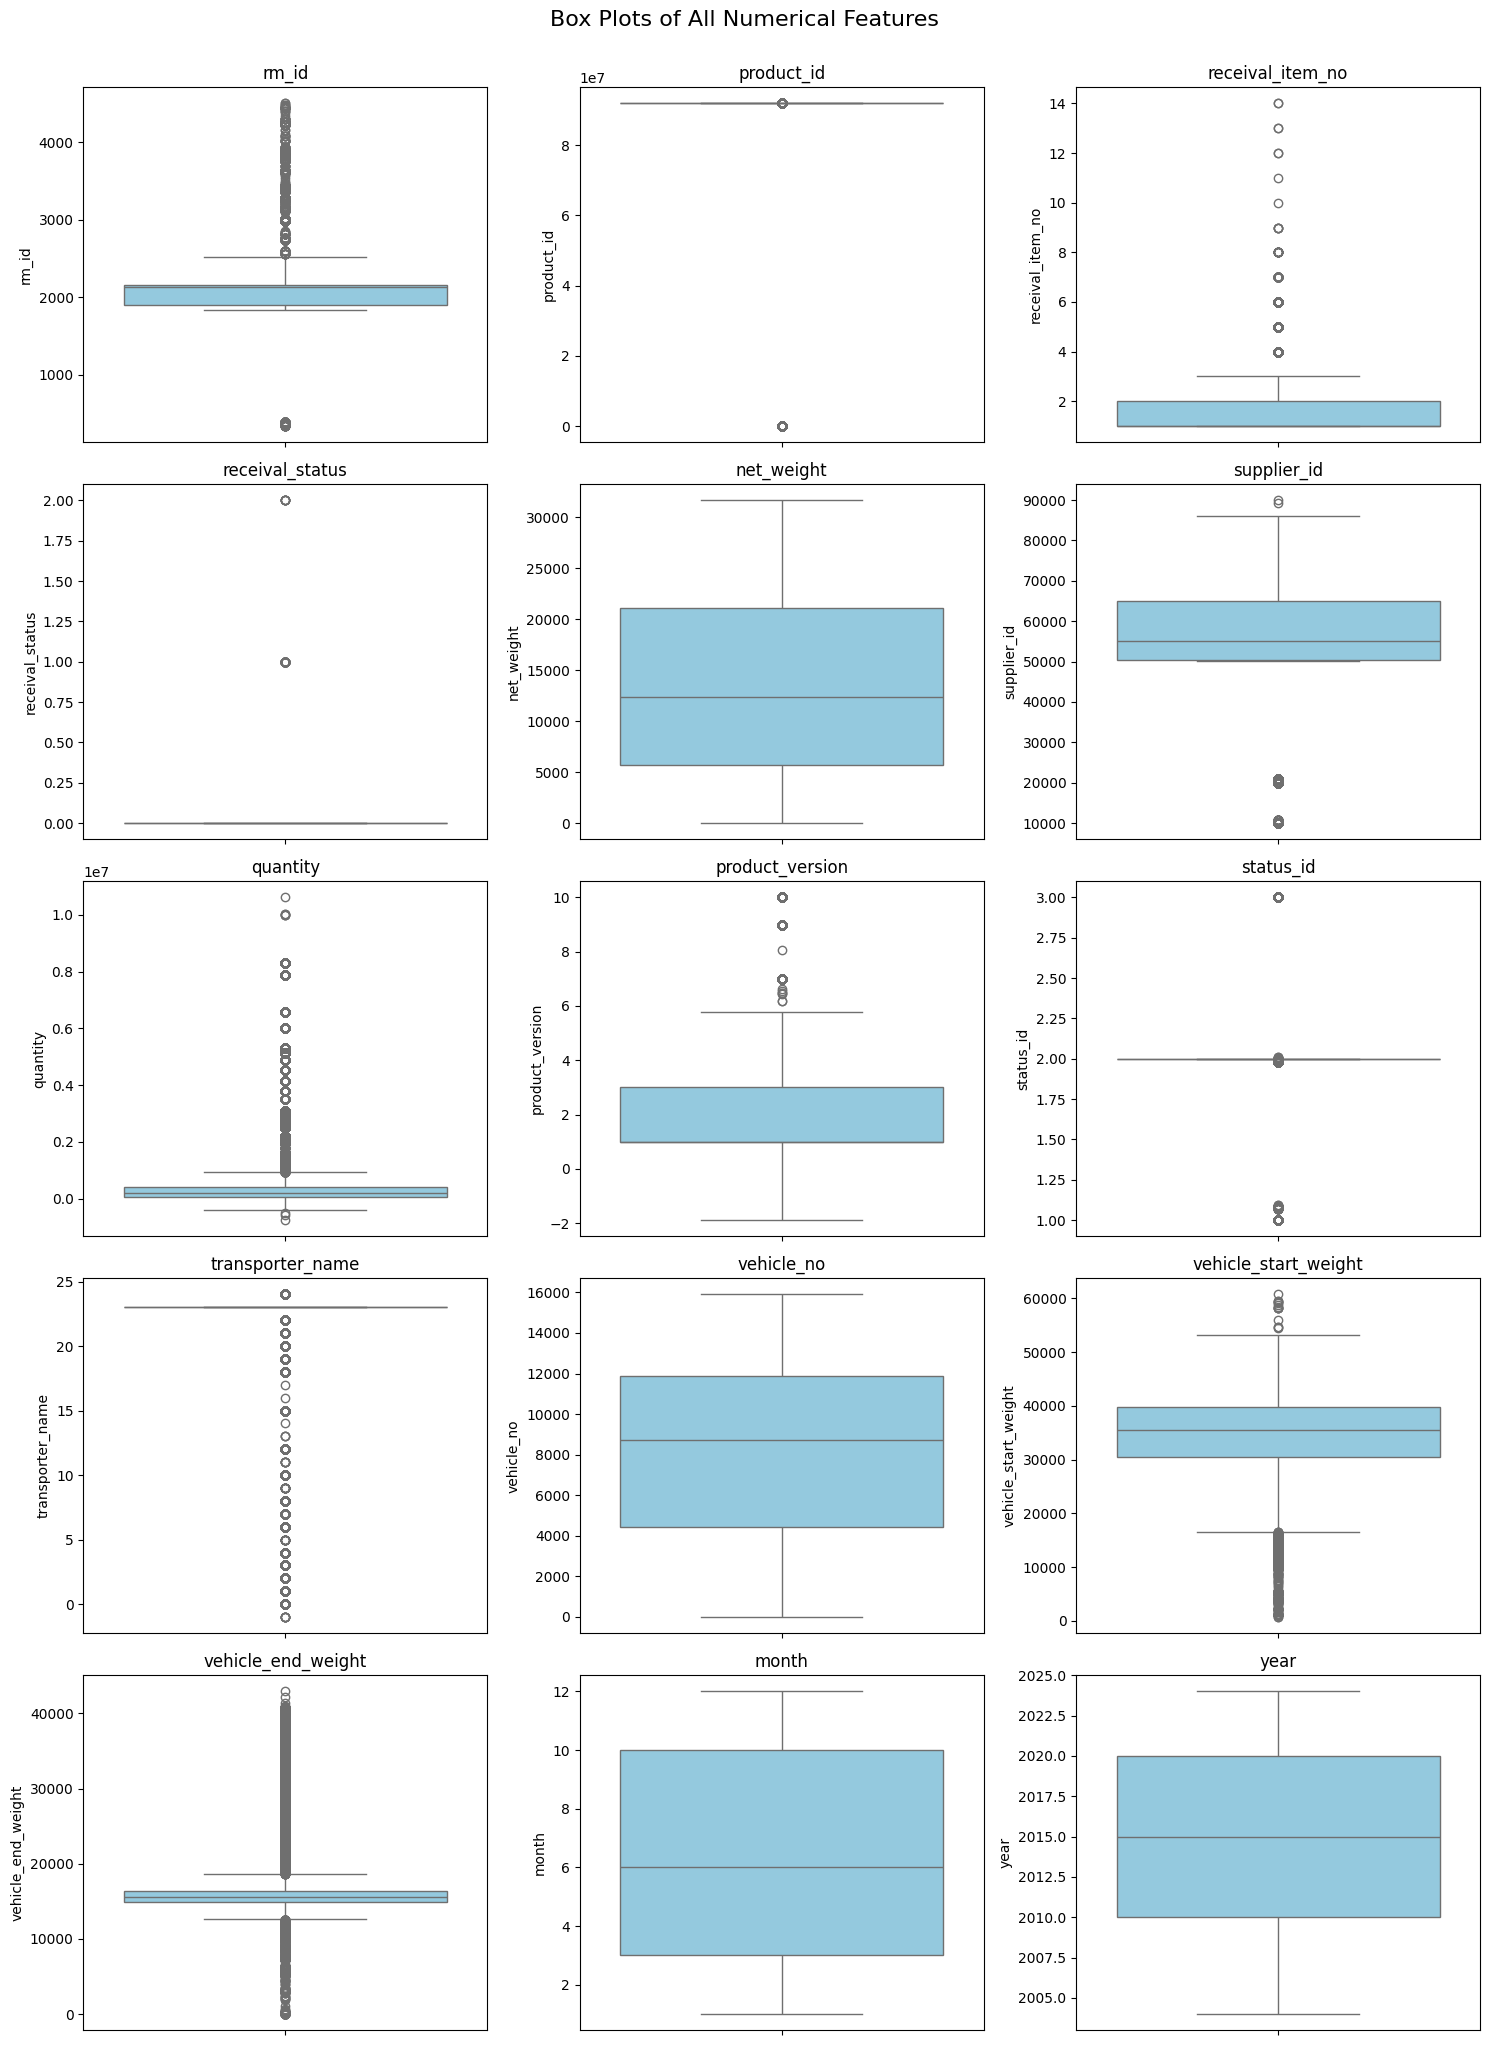

In [60]:
# Select numerical features
numeric_cols = df_rec_purchase.select_dtypes(include='number').columns

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_rec_purchase[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numerical Features", fontsize=16, y=1.02)
plt.show()

### PLOT COUNT BY TRANSPORTER_NAME

In [61]:
#count by transporter_name and print
transporter_counts = df_rec_purchase['transporter_name'].value_counts().reset_index()
transporter_counts.columns = ['transporter_name', 'count']
print(transporter_counts)


    transporter_name   count
0               23.0  105401
1               21.0    5742
2               12.0    3367
3               18.0    2157
4                1.0    1218
5               22.0     831
6               20.0     558
7                6.0     463
8               24.0     435
9               15.0     400
10               2.0     364
11              19.0     353
12               0.0     294
13               3.0     294
14               4.0     199
15              10.0     150
16               8.0     139
17               7.0     104
18               9.0      14
19               5.0      13
20              -1.0       7
21              11.0       6
22              13.0       3
23              14.0       1
24              16.0       1
25              17.0       1


### COUNT BY STATUS_ID

In [62]:
#count by status_id and print
transporter_counts = df_rec_purchase['status_id'].value_counts().reset_index()
transporter_counts.columns = ['status_id', 'count']
print(transporter_counts)

      status_id   count
0      2.000000  116775
1      1.000000    1595
2      3.000000     208
3      1.988446       4
4      1.989930       3
...         ...     ...
3900   1.988851       1
3901   1.986339       1
3902   1.984897       1
3903   1.983588       1
3904   1.991907       1

[3905 rows x 2 columns]


## COUNT BY SUPPLIER_ID

In [63]:
#count by supplier_id and print 
supplier_counts = df_rec_purchase['supplier_id'].value_counts().reset_index()
supplier_counts.columns = ['supplier_id', 'count']
print(supplier_counts)

     supplier_id  count
0        52036.0  10753
1        10001.0   8419
2        52064.0   7172
3        69879.0   6350
4        63948.0   6206
..           ...    ...
250      78391.0      1
251      68482.0      1
252      86009.0      1
253      89313.0      1
254      89894.0      1

[255 rows x 2 columns]


### COUNT BY RECEIVAL_STATUS

In [64]:
#count by receival_status and print
receival_counts = df_rec_purchase['receival_status'].value_counts().reset_index()
receival_counts.columns = ['receival_status', 'count']
print(receival_counts)

   receival_status   count
0              0.0  122433
1              1.0      75
2              2.0       7


### COUNT BY RECEIVAL_ITEM_NO

In [65]:
# count by receival_item_no and print
itemno_counts = df_rec_purchase['receival_item_no'].value_counts().reset_index()
itemno_counts.columns = ['receival_item_no', 'count']
print(itemno_counts)

    receival_item_no  count
0                1.0  87201
1                2.0  22127
2                3.0   8766
3                4.0   3062
4                5.0    963
5                6.0    295
6                7.0     73
7                8.0     16
8                9.0      4
9               12.0      2
10              13.0      2
11              14.0      2
12              10.0      1
13              11.0      1
